# Own findings

which variable serves as a best predictor for movie ratings/revenue

In [5]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [6]:
movieData = pd.read_csv("cleanData.csv")

In [7]:
movieData.head()

,Unnamed: 0,Unnamed: 0.1,budget,id,imdb_id,original_language,popularity,production_companies,production_countries,release_date,...,vote_average,vote_count,imdbID,Metascore,imdbRating,imdbVotes,Genre,Year,Ratings,Actors
0,0,3.0,50000000.0,587807.0,tt1361336,en,2400.425,"[{'id': 25120, 'logo_path': '/lqUpBvDLQYG3QaKN...","[{'iso_3166_1': 'US', 'name': 'United States o...",2021-02-11,...,7.4,1093.0,tt1361336,34,5.2,"17,138","Animation, Comedy, Family",2021,"[{'Source': 'Internet Movie Database', 'Value'...","Chloë Grace Moretz, Michael Peña, Tom, Jerry"
1,1,4.0,200000000.0,464052.0,tt7126948,en,2289.316,"[{'id': 9993, 'logo_path': '/2Tc1P3Ac8M479naPp...","[{'iso_3166_1': 'US', 'name': 'United States o...",2020-12-16,...,6.8,4653.0,tt7126948,60,5.4,"170,592","Action, Adventure, Fantasy",2020,"[{'Source': 'Internet Movie Database', 'Value'...","Gal Gadot, Chris Pine, Kristen Wiig, Pedro Pascal"
2,2,6.0,60000000.0,458576.0,tt6475714,en,2145.313,"[{'id': 7220, 'logo_path': '/dD0x5awPmtx4sAr2p...","[{'iso_3166_1': 'DE', 'name': 'Germany'}, {'is...",2020-12-03,...,7.1,1354.0,tt6475714,45,5.3,"27,224","Action, Adventure, Fantasy",2020,"[{'Source': 'Internet Movie Database', 'Value'...","Milla Jovovich, Tony Jaa, Ron Perlman, T.I."
3,3,11.0,30000000.0,602269.0,tt10016180,en,1413.354,"[{'id': 174, 'logo_path': '/ky0xOc5OrhzkZ1N6Ky...","[{'iso_3166_1': 'US', 'name': 'United States o...",2021-01-28,...,6.4,705.0,tt10016180,54,6.3,"49,167","Crime, Drama, Thriller",2021,"[{'Source': 'Internet Movie Database', 'Value'...","Denzel Washington, Rami Malek, Jared Leto, Chr..."
4,4,16.0,65000000.0,529203.0,tt2850386,en,1222.001,"[{'id': 33, 'logo_path': '/8lvHyhjr8oUKOOy2dKX...","[{'iso_3166_1': 'US', 'name': 'United States o...",2020-11-25,...,7.5,1889.0,tt2850386,56,7.0,"20,408","Animation, Adventure, Comedy, Family, Fantasy",2020,"[{'Source': 'Internet Movie Database', 'Value'...","Nicolas Cage, Emma Stone, Ryan Reynolds, Cathe..."


In [8]:
print(movieData.dtypes)

Unnamed: 0                int64
Unnamed: 0.1            float64
budget                  float64
id                      float64
imdb_id                  object
original_language        object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                 float64
runtime                 float64
spoken_languages         object
tagline                  object
title                    object
vote_average            float64
vote_count              float64
imdbID                   object
Metascore                 int64
imdbRating              float64
imdbVotes                object
Genre                    object
Year                      int64
Ratings                  object
Actors                   object
dtype: object


In [9]:
movieData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2272 entries, 0 to 2271
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            2272 non-null   int64  
 1   Unnamed: 0.1          2272 non-null   float64
 2   budget                2272 non-null   float64
 3   id                    2272 non-null   float64
 4   imdb_id               2272 non-null   object 
 5   original_language     2272 non-null   object 
 6   popularity            2272 non-null   float64
 7   production_companies  2272 non-null   object 
 8   production_countries  2272 non-null   object 
 9   release_date          2272 non-null   object 
 10  revenue               2272 non-null   float64
 11  runtime               2272 non-null   float64
 12  spoken_languages      2272 non-null   object 
 13  tagline               2272 non-null   object 
 14  title                 2272 non-null   object 
 15  vote_average         

<AxesSubplot:>

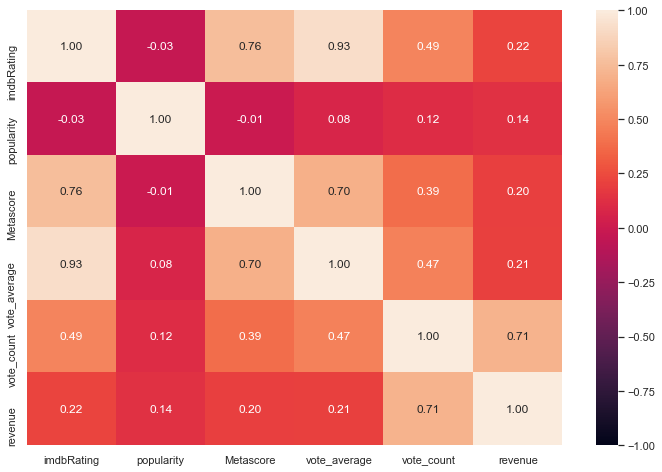

In [13]:
imdbscore = pd.DataFrame(movieData['imdbRating'])
popularity = pd.DataFrame(movieData['popularity'])
Metascore = pd.DataFrame(movieData['Metascore'])
vote_average = pd.DataFrame(movieData['vote_average'])
Ratings = pd.DataFrame(movieData['Ratings']) #type is not int, object instead
vote_count = pd.DataFrame(movieData['vote_count'])
revenue = pd.DataFrame(movieData['revenue'])


scoreDF = pd.concat([imdbscore, popularity, Metascore, vote_average, vote_count, revenue], axis = 1).reindex(imdbscore.index)
f = plt.figure(figsize=(12, 8))
sb.heatmap(scoreDF.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

The more relavant variables seems to be everything but popularity. We will drop vote count as well.

<AxesSubplot:>

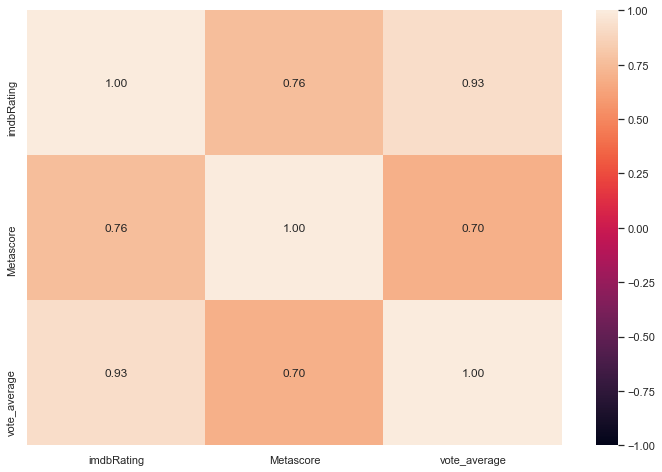

In [11]:
updated_scoreDF = pd.concat([imdbscore, Metascore, vote_average], axis = 1).reindex(imdbscore.index)
f = plt.figure(figsize=(12, 8))
sb.heatmap(updated_scoreDF.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

Number of movies : 2272


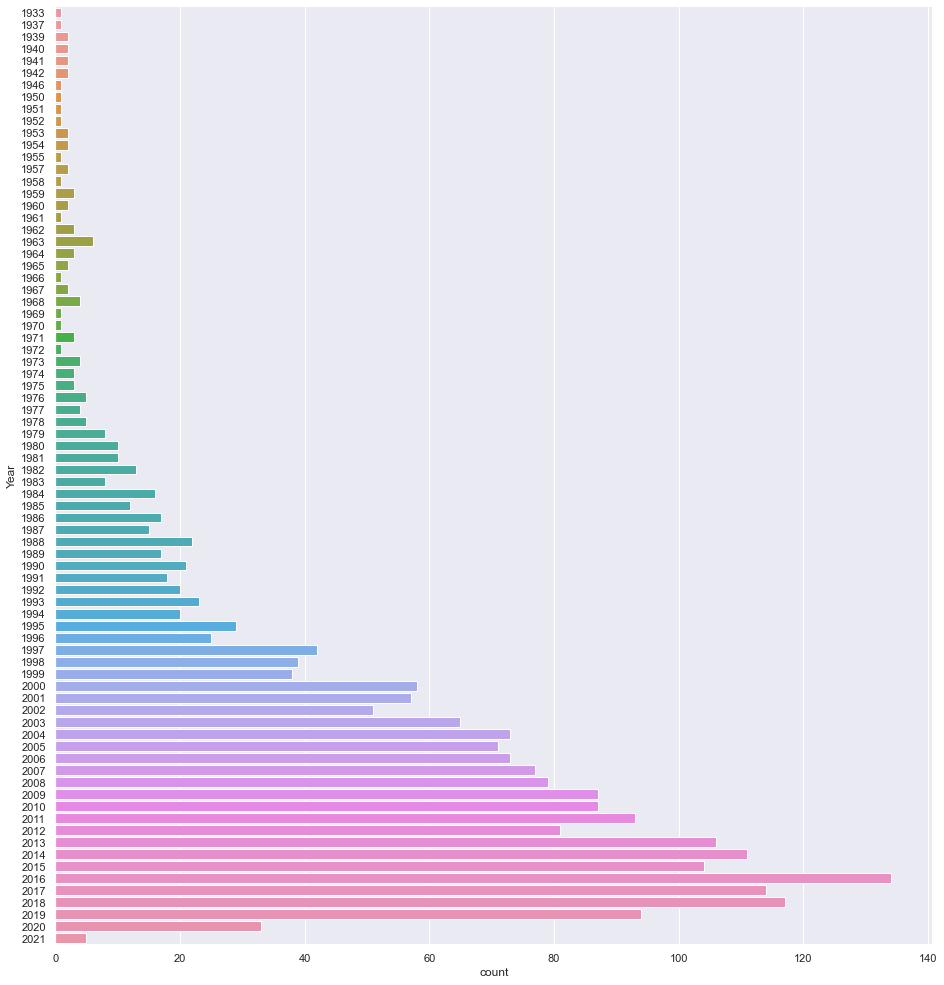

In [12]:
print("Number of movies :", len(movieData["id"].unique()))

# Movies in each year
g = sb.catplot(y = "Year", data = movieData, kind = "count")
g.fig.set_size_inches(15,15)

<AxesSubplot:>

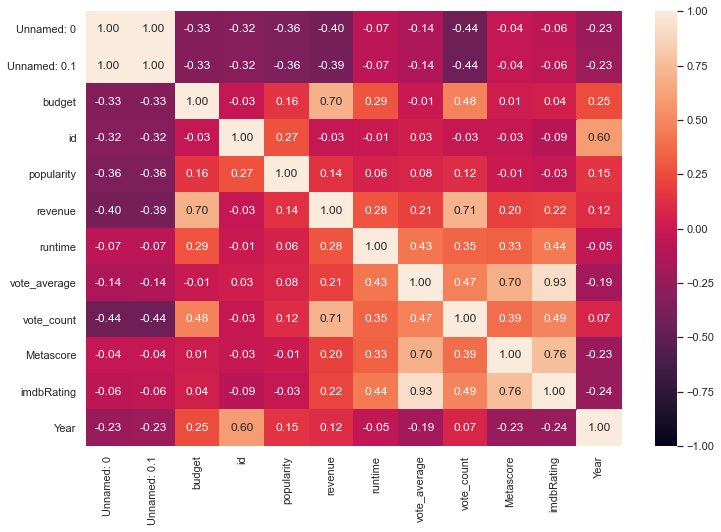

In [3]:
f = plt.figure(figsize=(12, 8))
sb.heatmap(movieData.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

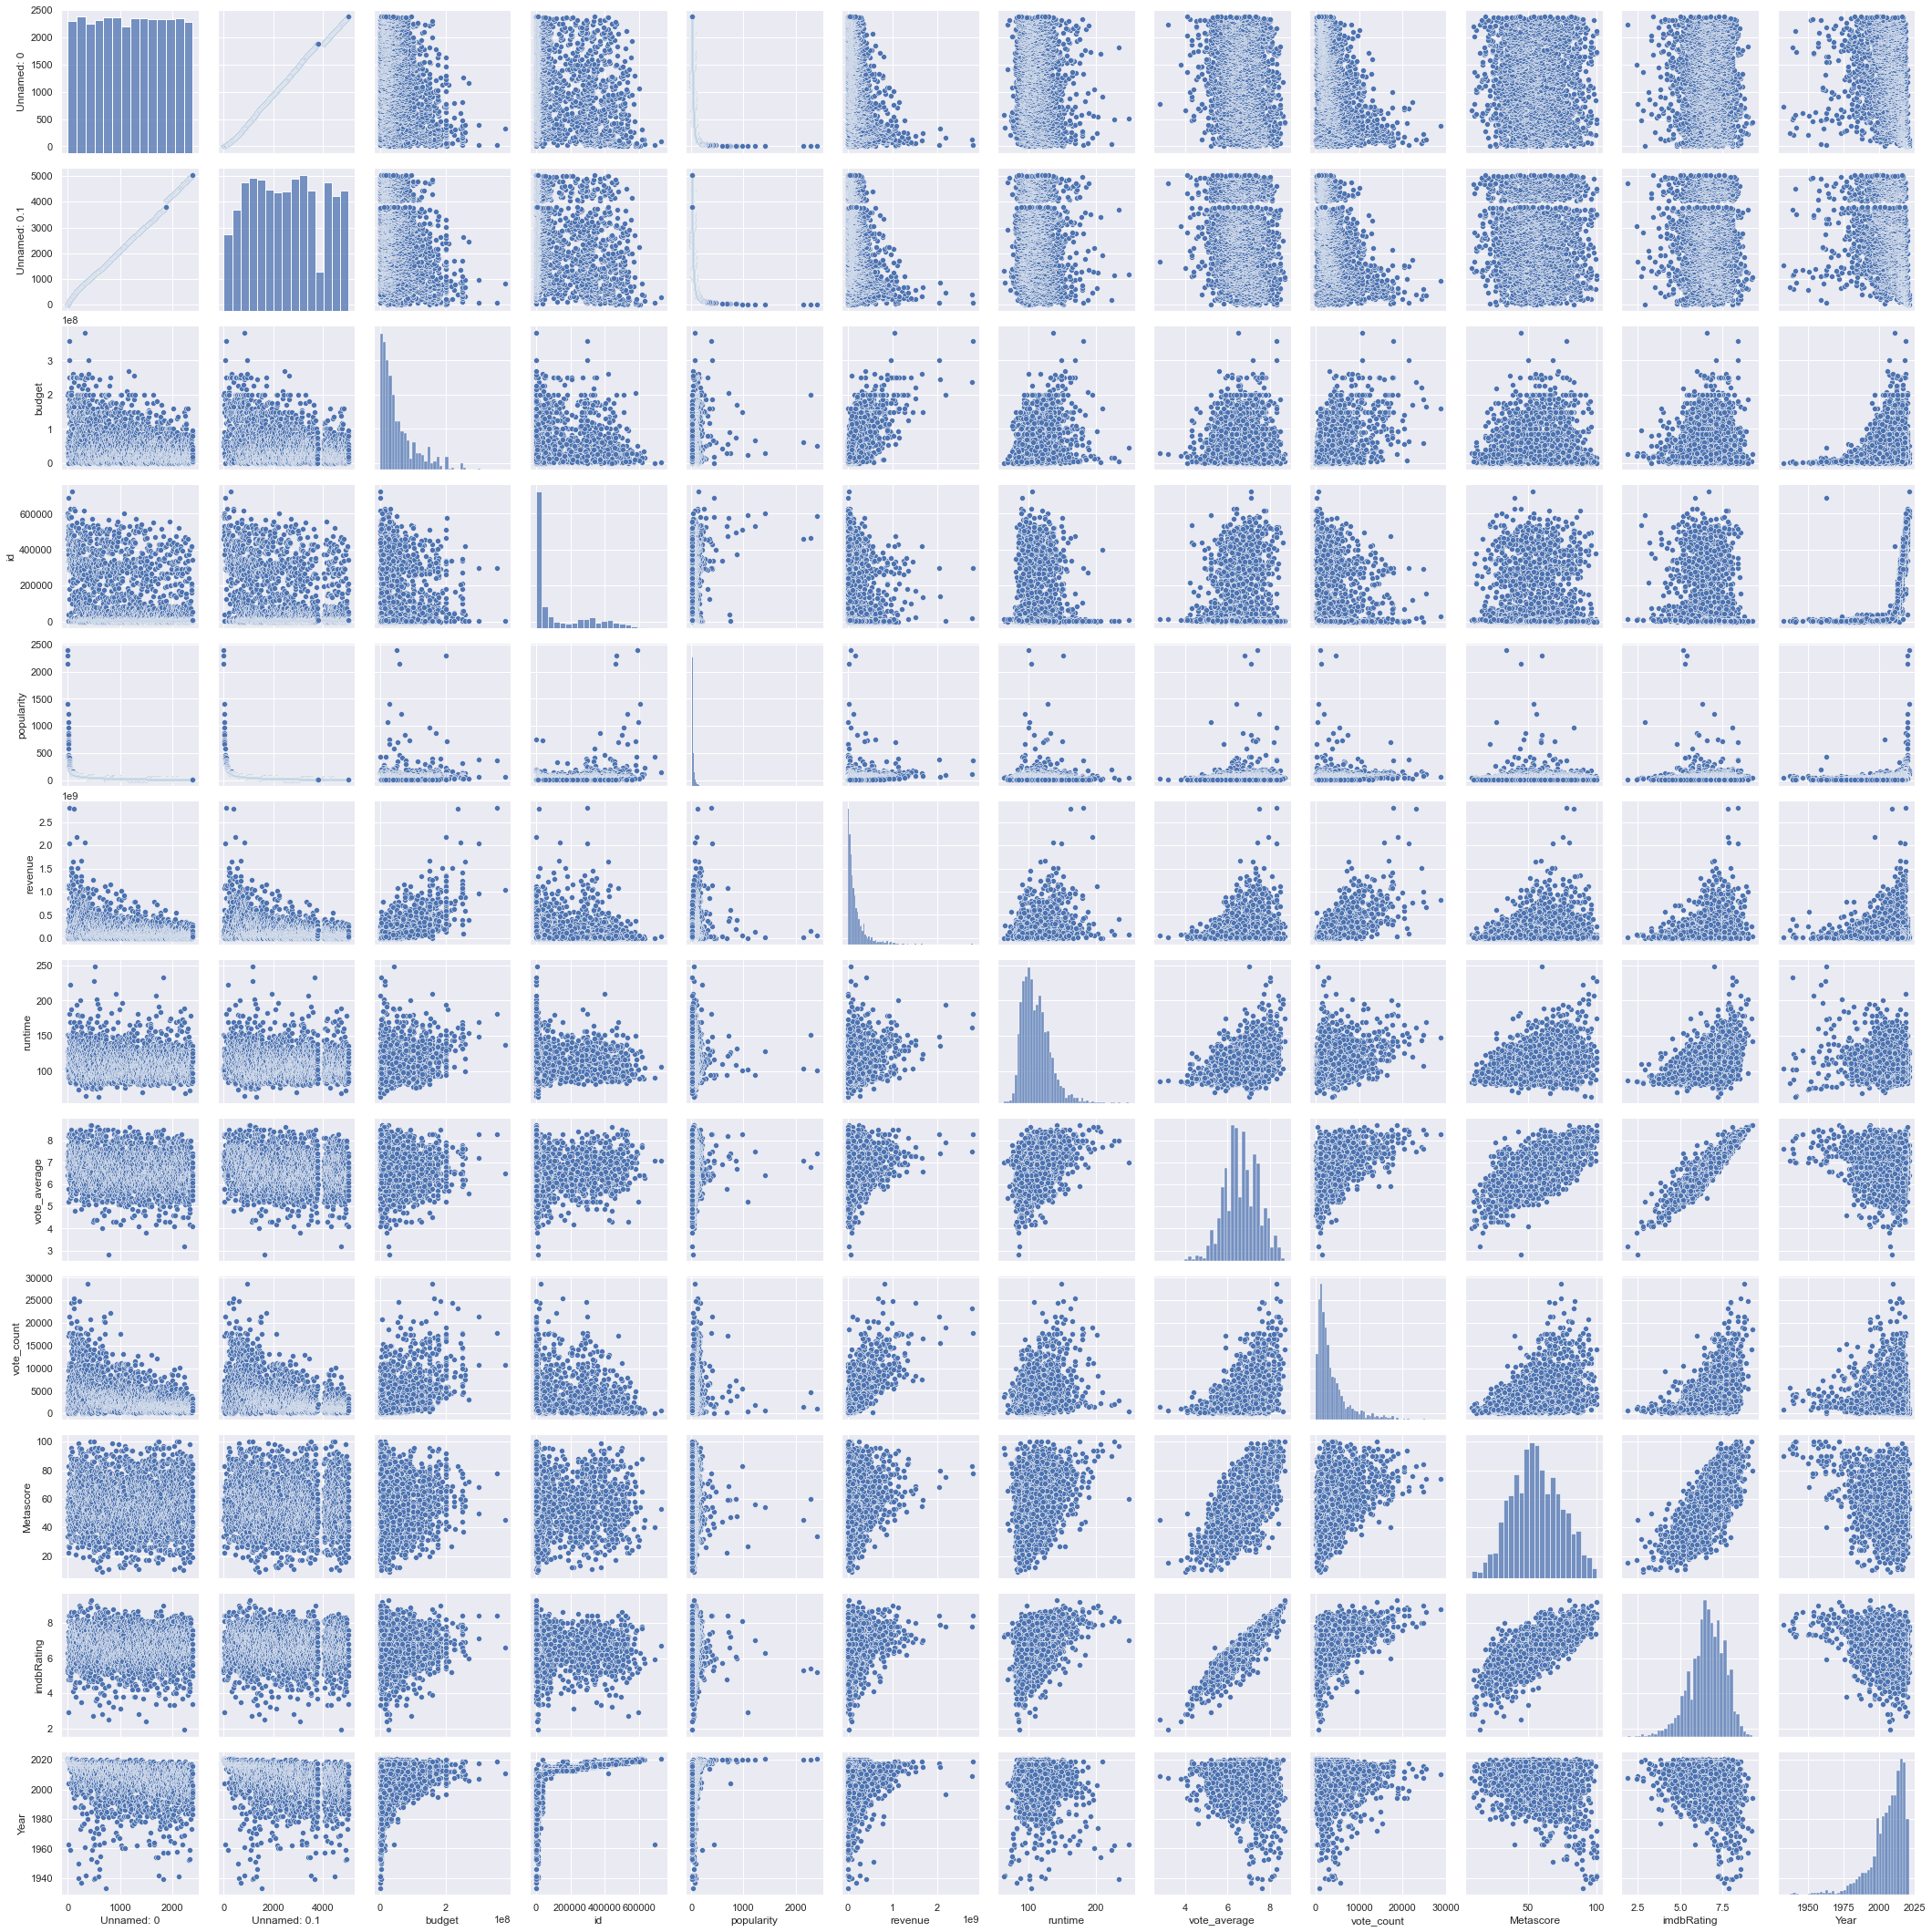

In [4]:
sb.pairplot(data = movieData)

1. Increase dataset and clean.
2. Check the correlation matrix, see if any worth looking into
3. Split data into train and test
4. Set up predictors and all